In [26]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. 카테고리 분포
* 카테고리 분포(Categorical distribution) : $1 ∼ K$까지의 $K$개의 정수 값 중 하나가 나오는 확률변수의 분포  
ex)  
주사위를 던져 나오는 눈금의 수는 $K = 6$인 카테고리 분포이다. 
* 카테고리 분포를 가진 확률변수는 1과 0으로 이루어진 다차원 벡터로 변형하여 사용한다.  
즉 **원-핫-인코딩(One-Hot-Encoding)** 방식을 사용한다.
$$ x = 1 → x = (1, 0, 0, 0, 0, 0) $$
$$ x = 2 → x = (0, 1, 0, 0, 0, 0) $$
$$ x = 3 → x = (0, 0, 1, 0, 0, 0) $$
$$ x = 4 → x = (0, 0, 0, 1, 0, 0) $$
$$ x = 5 → x = (0, 0, 0, 0, 1, 0) $$
$$ x = 6 → x = (0, 0, 0, 0, 0, 1) $$
* 즉 확률변수의 값 $x$는 다음과 같은 벡터이다.
$$ x = (x_1, x_2, x_3, x_4, x_5, x_6) $$
* 이 벡터를 구성하는 원소 $x_1, x_2, x_3, x_4, x_5, x_6$의 제한 조건
$$ x_i = \begin{cases} 0 \\ 1 \end{cases} $$
$$ \sum_{k=1}^Kx_k = 1 $$
    * 첫 번째 제한 조건 : $x_k$의 값은 0 또는 1만 가능하다.
    * 두 번째 제한 조건 : 여러 개의 $x_k$ 중 단 하나만 1이다.
* 각각의 원소 값 $x_k$는 일종의 베르누이 확률분포로 볼 수 있기 때문에 각각 1이 나올 확률을 나타내는 모수 $u_k$를 가진다.  
전체 카테고리 분포의 모수는
$$ \mu = (\mu_1, \dots, \mu_k) $$
* 이 모수 벡터의 제한 조건
$$ 0 ≤ \mu_i ≤ 1 $$
$$ \sum_{k=1}^K\mu_k = 1 $$
    * 첫 번째 제한 조건 : 모수 $\mu_k$가 0 ~ 1 사이 값만 가진다.
    * 두 번째 제한 조건 : $\mu_k$의 합은 1이다.
        * 단, 0 아니면 1만 되어야 하는 $x_k$와 달리 $\mu_k$는 0 ~ 1 사이의 어떤 실수 값이든 가질 수 있다.
* 카테고리 분포의 표기 
$$ Cat(x_1, \dots, x_K;\mu_1, \dots, \mu_k) $$
또는 출력 벡터 $x = (x_1, \dots, x_K)$, 모수 벡터 $\mu = (\mu_1, \dots, \mu_K)$를 사용하여 표기
$$ Cat(x;\mu) $$
* 확률질량함수
$$ Cat(x;\mu) = \begin{cases} 
    \mu_1 & \text{ if } x = (1,0,0,\dots,0) \\ 
    \mu_2 & \text{ if } x = (0,1,0,\dots,0) \\ 
    \dots & \dots \\ 
    \mu_K & \text{ if } x = (0,0,0,\dots,1) 
    \end{cases} $$
* 확률질량함수의 간단 표기
$$ Cat(x;\mu) = \mu_1^{x_1}\mu_2^{x_2}\dots\mu_K^{x_K} = \prod_{k=1}^K\mu_k^{x_k} $$

## 연습 문제
$K = 2$인 카테고리 분포의 확률질량함수가 이항 확률분포의 확률질량함수와 같음을 보여라.

# 2. 카테고리 분포의 모멘트
카테고리 분포는 표본값이 벡터이므로 기댓값과 분산도 벡터이다.
* 기댓값
$$ E[x_k] = \mu_k $$
* 분산
$$ Var[x_k] = \mu_k(1 - \mu_k) $$

# 3. SciPy를 이용한 카테고리 분포의 시뮬레이션
SciPy는 카테고리 분포를 위한 클래스를 제공하지 않기 때문에 다항 분포를 위한 `multinomial` 클래스에서 시행 횟수를 1로 설정하여 사용한다.

In [27]:
import numpy as np
import scipy as sp

mu = np.array([1/6]*6)
rv = sp.stats.multinomial(1, mu)

In [28]:
# 카테고리 분포에서 나올 수 있는 벡터값들
import pandas as pd

xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


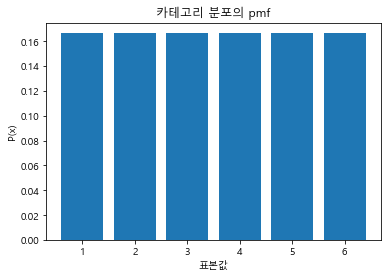

In [29]:
# pmf 메서드의 인수로도 벡터를 넣어야 한다.
import matplotlib.pyplot as plt

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("카테고리 분포의 pmf")
plt.show()

In [30]:
# 시뮬레이션으로 생성한 값도 벡터이다.
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

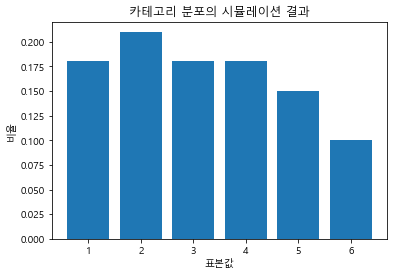

In [31]:
# 시뮬레이션 결과
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리 분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [32]:
# 이론적인 확률분포와 시뮬레이션 결과 비교
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션":y},
                 index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,이론,0.166667
1,1,시뮬레이션,0.180000
2,2,이론,0.166667
3,2,시뮬레이션,0.210000
4,3,이론,0.166667
5,3,시뮬레이션,0.180000
6,4,이론,0.166667
7,4,시뮬레이션,0.180000
8,5,이론,0.166667
9,5,시뮬레이션,0.150000


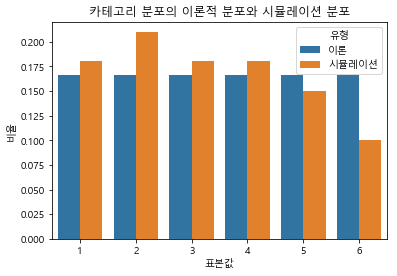

In [33]:
import seaborn as sns

sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리 분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

## 연습 문제
카테고리 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률밀도함수와 비교한 바 플롯을 그린다.  
표본의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.
1. $\mu = (0.25, 0.25, 0.25, 0.25)$
2. $\mu = (0.3, 0.3, 0.2, 0.2)$